<a href="https://colab.research.google.com/github/vidhya2324/Neutral_network/blob/main/Dog_Cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we predict the dog or cat by using transfer learning
* Transfer learning is the one of the technique in deep learning model where a model trained on one task is reused for another related task

In [7]:
!pip install kaggle

In [8]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#import the dataset of cat and dog classification

In [5]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:07<00:00, 175MB/s]
100% 812M/812M [00:07<00:00, 109MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [9]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


#Printing the name of the image

In [12]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1841.jpg', 'cat.6502.jpg', 'cat.8978.jpg', 'cat.11912.jpg', 'cat.10963.jpg', 'dog.4542.jpg', 'dog.6216.jpg', 'cat.5495.jpg', 'cat.35.jpg', 'cat.334.jpg', 'cat.11710.jpg', 'cat.6094.jpg', 'dog.2592.jpg', 'dog.2678.jpg', 'cat.138.jpg', 'cat.8190.jpg', 'dog.2714.jpg', 'dog.12121.jpg', 'cat.9392.jpg', 'cat.9822.jpg', 'dog.2059.jpg', 'dog.11389.jpg', 'cat.3728.jpg', 'cat.8316.jpg', 'dog.1084.jpg', 'dog.550.jpg', 'dog.4809.jpg', 'cat.12019.jpg', 'dog.8190.jpg', 'dog.9513.jpg', 'cat.11373.jpg', 'cat.8297.jpg', 'dog.8856.jpg', 'cat.6697.jpg', 'dog.4069.jpg', 'dog.10814.jpg', 'dog.4040.jpg', 'dog.2479.jpg', 'cat.7367.jpg', 'dog.1849.jpg', 'dog.3827.jpg', 'dog.2126.jpg', 'cat.11694.jpg', 'dog.5052.jpg', 'dog.9197.jpg', 'cat.7744.jpg', 'dog.11086.jpg', 'cat.10242.jpg', 'cat.7886.jpg', 'cat.7533.jpg', 'dog.12145.jpg', 'cat.3114.jpg', 'cat.10428.jpg', 'dog.6480.jpg', 'dog.12335.jpg', 'dog.5611.jpg', 'cat.3073.jpg', 'cat.992.jpg', 'dog.7471.jpg', 'dog.8747.jpg', 'cat.11464.jpg', 'cat.1658.jpg'

#Importing the neccessary libraries

In [13]:
import numpy as np
from PIL import Image #pil is pillow and the purpose we use the pillow is easy-to-use methods for opening, manipulating, and saving image files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

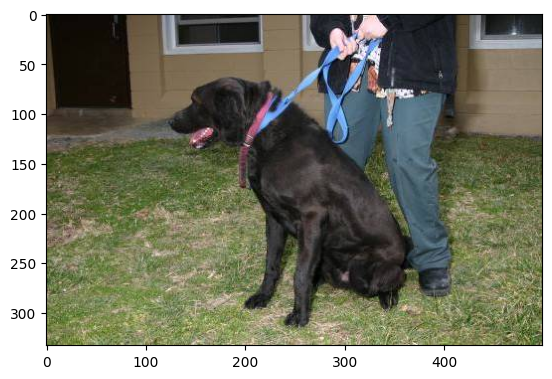

In [26]:
#displaying the dog and cat

img=mpimg.imread("/content/train/dog.8493.jpg")
imgplt=plt.imshow(img)
plt.show()

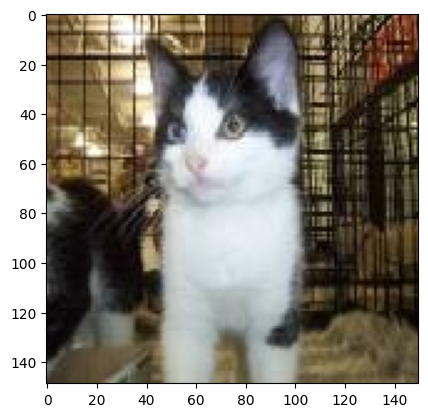

In [36]:
#display cat
img=mpimg.imread("/content/train/cat.1000.jpg")
imgplt=plt.imshow(img)
plt.show()

In [16]:
file_names = os.listdir('/content/train/')

for i in range(10):

  name = file_names[i]
  print(name[0:3])

cat
cat
cat
cat
cat
dog
dog
cat
cat
cat


In [17]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name in 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


#resizing the all the image size

In [22]:
#creating a directory for resized images
os.mkdir('/content/image resize')

In [27]:
original_folder="/content/train/"
resized_folder="/content/image resize/"

In [28]:

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

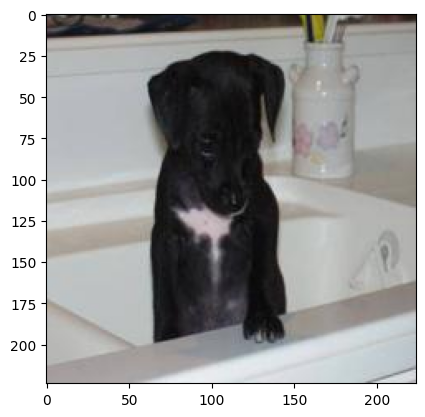

In [30]:
# display resized dog image
img = mpimg.imread('/content/image resize/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

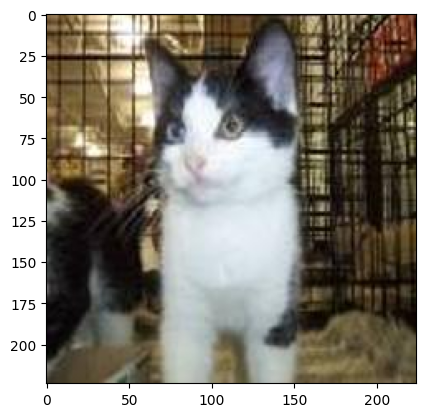

In [37]:
# display resized cat image
img = mpimg.imread('/content/image resize/cat.1000.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

cat-->0

dog-->1

In [39]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resize/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [40]:
print(filenames[0:5])
print(len(filenames))

['cat.1841.jpg', 'cat.6502.jpg', 'cat.8978.jpg', 'cat.11912.jpg', 'cat.10963.jpg']
2000


In [42]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [43]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 992 1008]


In [46]:
import cv2
import glob# glob is used to easy to manipulate the files

In [47]:
image_directory = '/content/image resize/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [48]:
print(dog_cat_images)

[[[[134 140 151]
   [135 141 152]
   [136 142 153]
   ...
   [ 75  75  75]
   [ 83  85  86]
   [ 74  76  77]]

  [[134 140 151]
   [135 141 152]
   [136 142 153]
   ...
   [ 72  74  75]
   [ 80  83  87]
   [ 79  82  86]]

  [[134 140 151]
   [135 141 152]
   [136 142 153]
   ...
   [ 71  76  79]
   [ 72  78  83]
   [ 78  84  89]]

  ...

  [[180 199 202]
   [123 142 145]
   [116 133 136]
   ...
   [249 253 254]
   [245 250 249]
   [242 247 246]]

  [[184 205 207]
   [123 142 145]
   [119 136 139]
   ...
   [249 254 253]
   [244 249 248]
   [240 245 244]]

  [[185 206 208]
   [122 143 145]
   [119 136 139]
   ...
   [249 254 253]
   [244 249 248]
   [239 244 243]]]


 [[[180 189 226]
   [180 189 226]
   [182 189 228]
   ...
   [134 175 208]
   [141 179 213]
   [141 179 213]]

  [[180 189 226]
   [180 189 226]
   [181 188 227]
   ...
   [134 175 208]
   [141 179 213]
   [142 180 214]]

  [[180 189 227]
   [180 189 227]
   [182 189 228]
   ...
   [135 176 209]
   [142 180 214]
   [142 180

In [49]:
type(dog_cat_images)

numpy.ndarray

In [50]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [52]:
x=dog_cat_images
y=np.asarray(labels)

**Train Test split**

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


training data--> 1600

testing data--> 400

In [55]:
#scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [56]:
print(x_train_scaled)

[[[[0.26666667 0.63529412 0.45098039]
   [0.40784314 0.76862745 0.58431373]
   [0.38431373 0.73333333 0.56078431]
   ...
   [0.73333333 0.58823529 0.43921569]
   [0.72941176 0.58039216 0.44313725]
   [0.7254902  0.57647059 0.43921569]]

  [[0.26666667 0.61960784 0.43921569]
   [0.34509804 0.69803922 0.51764706]
   [0.38823529 0.72156863 0.54901961]
   ...
   [0.71372549 0.57254902 0.43137255]
   [0.69803922 0.54901961 0.41568627]
   [0.67843137 0.53333333 0.4       ]]

  [[0.36862745 0.69411765 0.51764706]
   [0.36470588 0.68235294 0.50588235]
   [0.44313725 0.75294118 0.58431373]
   ...
   [0.68627451 0.54901961 0.41568627]
   [0.6745098  0.5254902  0.4       ]
   [0.65490196 0.51764706 0.38823529]]

  ...

  [[0.41176471 0.65098039 0.50196078]
   [0.25098039 0.49411765 0.3372549 ]
   [0.30588235 0.56078431 0.38431373]
   ...
   [0.56862745 0.75294118 0.72156863]
   [0.52156863 0.70588235 0.6745098 ]
   [0.49411765 0.67843137 0.64705882]]

  [[0.54117647 0.75294118 0.60784314]
   [0.2

In [57]:
print(x_test_scaled)

[[[[0.60784314 0.57254902 0.0745098 ]
   [0.61176471 0.58039216 0.09411765]
   [0.61568627 0.58431373 0.10196078]
   ...
   [0.30980392 0.38823529 0.40784314]
   [0.41568627 0.47843137 0.50196078]
   [0.30980392 0.37254902 0.39607843]]

  [[0.60784314 0.57254902 0.0745098 ]
   [0.61176471 0.58039216 0.09411765]
   [0.61568627 0.58431373 0.10196078]
   ...
   [0.47058824 0.54901961 0.56862745]
   [0.51372549 0.58823529 0.60784314]
   [0.36862745 0.43137255 0.45490196]]

  [[0.60784314 0.57254902 0.0745098 ]
   [0.61176471 0.58039216 0.09411765]
   [0.61568627 0.58431373 0.10196078]
   ...
   [0.47058824 0.54901961 0.56862745]
   [0.56078431 0.63529412 0.65490196]
   [0.42352941 0.49803922 0.51764706]]

  ...

  [[0.53333333 0.51372549 0.1254902 ]
   [0.53333333 0.51764706 0.11764706]
   [0.5372549  0.52156863 0.12156863]
   ...
   [0.98823529 0.98823529 0.98823529]
   [0.98823529 0.98823529 0.98823529]
   [0.98823529 0.98823529 0.98823529]]

  [[0.53333333 0.51764706 0.11764706]
   [0.5

#building the neutral network

In [69]:
!pip install --upgrade tensorflow tensorflow-hub

import tensorflow as tf
import tensorflow_hub as hub

In [71]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [76]:
import tensorflow as tf

# Assuming pretrained_model is a TensorFlow Hub KerasLayer
num_of_classes = 2

# Create a functional model instead of a Sequential model
input_layer = tf.keras.Input(shape=(input_shape))  # Replace input_shape with your actual input shape
x = pretrained_model(input_layer)
output_layer = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()


NameError: name 'input_shape' is not defined

In [75]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(1)

])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7da292771750> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)